Лабораторна робота №2 ФІТ 4-6 Піць А.В.
Завдання №1

Форма датасету: (5000, 13)
Назви колонок: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00         

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


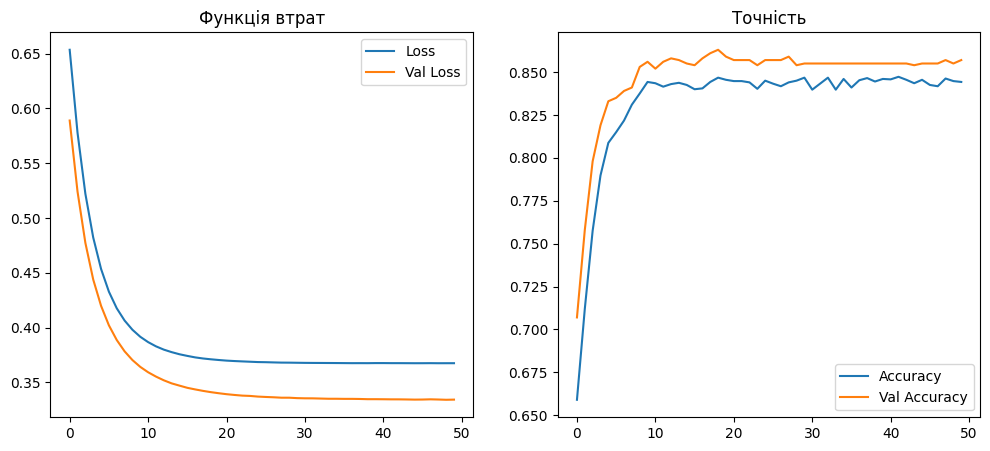


Класична логістична регресія:
Accuracy: 0.851

Звіт класифікації:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       698
           1       0.76      0.74      0.75       302

    accuracy                           0.85      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.85      0.85      0.85      1000



In [3]:
# 1. Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 2. Завантаження даних
df = pd.read_csv("heart.csv")  # або шлях до твого файлу

# 3. Аналіз структури
print("Форма датасету:", df.shape)
print("Назви колонок:", df.columns)
print(df.head())

# 4. Підготовка даних
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Побудова логістичної регресії з Keras
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(X_scaled.shape[1],)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_scaled, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# 6. Побудова графіків
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Функція втрат')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Точність')
plt.legend()

plt.show()

# 7. Класична логістична регресія (Sklearn)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("\nКласична логістична регресія:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nЗвіт класифікації:\n", classification_report(y_test, y_pred))


Висновок: У цій роботі ми виконали повний аналіз даних про серцеві захворювання з датасету heart.csv, побудували дві моделі логістичної регресії: одну на базі нейронної мережі Keras, іншу класичну Scikit-learn. Обидві моделі показали схожі результати. Побудовані графіки втрат і точності допомогли візуально оцінити процес навчання. Це дозволяє впевнено використовувати логістичну регресію для прогнозу смертності пацієнтів на основі медичних показників.